Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Train Loss: 1.8550526763472106, Test Loss: 1.6645680225578843, Accuracy: 41.0%
Epoch 2, Train Loss: 1.7424486314549166, Test Loss: 1.6273857894217132, Accuracy: 43.84%
Epoch 3, Train Loss: 1.6969359044528678, Test Loss: 1.551209549994985, Accuracy: 46.23%
Epoch 4, Train Loss: 1.6690467955816128, Test Loss: 1.5312380236425218, Accuracy: 45.9%
Epoch 5, Train Loss: 1.6493025859603492, Test Loss: 1.5332609490983804, Accuracy: 46.75%
Epoch 6, Train Loss: 1.627654150471358, Test Loss: 1.5635666080341217, Accuracy: 46.73%
Epoch 7, Train Loss: 1.6172227562236055, Test Loss: 1.5349522168469276, Accuracy: 45.95%
Epoch 8, Train Loss: 1.5994258099199865, Test Loss: 1.513357766114982, Accuracy: 46.42%
Epoch 9, Train Loss: 1.5887692209399875, Test Loss: 1.5007256512429303, Accuracy: 47.36%
Epoch 10, Train Loss: 1.5749652905537344, Test Loss: 1.4954670409488071, Accuracy: 47.4%


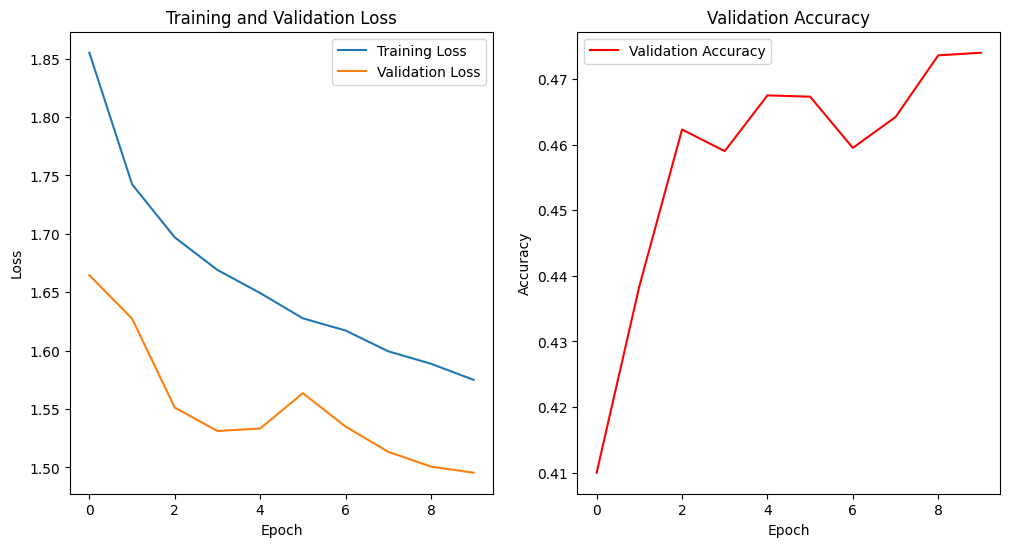

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch.nn.functional as F


# MLP Model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(3*32*32, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = x.view(-1, 3*32*32) # Flatten the image
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Data preparation
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training and Evaluation
epochs = 10
train_losses, test_losses, test_accuracies = [], [], []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(train_loader))

    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_losses.append(test_loss / len(test_loader))
    test_accuracies.append(correct / total)

    print(f"Epoch {epoch+1}, Train Loss: {train_losses[-1]}, Test Loss: {test_losses[-1]}, Accuracy: {test_accuracies[-1]*100}%")

# Plotting training results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Validation Accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()
plt.show()
